In [21]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

In [22]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  


[736536. 736535. 736534. 736531. 736530. 736529. 736528. 736527. 736524.
 736523.]
[153.35 151.8  150.58 149.99 151.5  150.48 149.2  148.82 147.97 145.5 ]


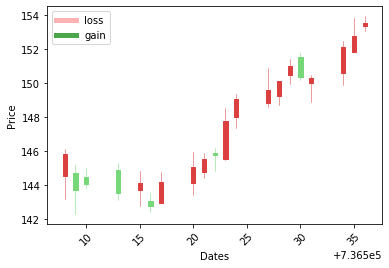

In [23]:
def graph_data(stock):
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)
                
    #print(stock_data)
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})
    
    x = 0
    y = len(date)
    ohlc = []

    while x < 20:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1

    print(date[:10])
    print(closep[:10])
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    
    #to make the legend work
    ax1.plot([],[], linewidth=5, label='loss', color='r', alpha=0.3)
    ax1.plot([],[], linewidth=5, label='gain', color='g', alpha=0.7)
    
    for label in ax1.xaxis.get_ticklabels():#for rotated x axis labels
        label.set_rotation(45)
        
       
    plt.xlabel('Dates')
    plt.ylabel('Price')
    #plt.subplots_adjust(left=0.9, bottom=0.18, right=0.94, top=0.95, wspace=0.2, hspace=0)
    plt.legend()
    plt.show()
    
graph_data('EBAY')